Train model

In [1]:
import torch.optim as optim

import car.env as e
from car.car_net import CarNet
import car.a2c as a2c

In [2]:
e.set_seed(seed=10)

model = CarNet()

optimizer = optim.Adam(model.parameters(), lr=0.0005, eps=1e-3)


alg = a2c.A2C(model, optimizer, gamma=0.90, policy_weight=1.,
              value_weight=0.1, entropy_weight=1., clip_grad=10.,tensor_board=False)

def make_env_fn():
    return e.Env()

vec_env = e.VecEnv(make_env_fn, 3)

alg.train(vec_env, ev_env=make_env_fn(), max_steps=1e7, n_steps=5)

    norms of grads =  [0.05, 0.09, 0.88, 0.21, 4.57, 0.51, 0.37, 1.24, 1.41, 0.17, 0.13, 0.45]
    policy=-9.715, value=24.64, entropy=-2.2, en_w=1.0
soft_stop ==> True [-10.0]
soft_stop ==> True [-10.0]
lawn ==> False [-15]
soft_stop ==> True [-10.0]
lawn ==> False [-15]
TIME= 0.0 min., FAST (avg_velosity, ratio_steps)=[(0.0, 0), (0.0, 0), (1.4, 0), (0.0, 0), (1.4, 0)],
STEPS= [1, 1, 1, 1, 1], finished 0 / 5


    norms of grads =  [10.92, 13.19, 21.43, 4.45, 33.24, 0.5, 85.89, 1.86, 16.45, 0.39, 35.87, 0.97]
    policy=-12.538, value=100.07, entropy=-0.53, en_w=0.4
lawn ==> False [6.5, 13.48, 22.63, 30, 30, -121.96, -30]
lawn ==> False [1.87, 6.5, 13.48, -28.41]
lawn ==> False [12.13, 18.12, 25.16, 18.77, 14.82, 12.81, -96.63]
lawn ==> False [30, 30, 30, 30, 30, 30, -314.47]
lawn ==> False [1.87, 6.5, -15]
TIME= 4.4 min., FAST (avg_velosity, ratio_steps)=[(5.6, 0), (3.5, 0), (3.9, 0), (7.1, 0), (2.2, 0)],
STEPS= [8, 4, 10, 12, 3], finished 0 / 5


    norms of grads =  [26.26, 96.77,

Evaluate trained model

In [5]:
e.set_seed(seed=10)

model = CarNet()

optimizer = optim.Adam(model.parameters(), lr=0.0005, eps=1e-3)

trained_alg = a2c.A2C(model, optimizer, gamma=0.90, policy_weight=1., value_weight=0.1, entropy_weight=1., clip_grad=10.,
                      checkpoint="checkpoint.pth", tensor_board=False)

trained_alg.evaluate(ev_env=e.Env())


loading checkpoint checkpoint.pth
finished ==> False [4.26, 4.26, 7.94, 12.81, 14.82, 13.48, 14.82]
finished ==> False [12.81, 7.22, 4.26, 4.26, 7.22, 12.81, 18.77]
finished ==> False [25.79, 18.77, 12.13, 12.81, 10.06, 10.06, 12.81]
finished ==> False [30, 25.79, 18.12, 12.81, 10.06, 10.06, 12.81]
finished ==> False [18.77, 12.13, 7.94, 6.5, 7.94, 12.13, 18.77]
TIME= 0.0 min., FAST (avg_velosity, ratio_steps)=[(4.3, 4.38), (4.6, 4.41), (4.2, 4.21), (4.6, 4.4), (4.4, 4.54)],
STEPS= [47, 51, 62, 57, 59], finished 5 / 5




55.2

loading checkpoint checkpoint.pth
finished ==> False [18.12, 18.77, 12.13, 7.94, 6.5, 7.94, 12.13]
TIME= 0.0 min., FAST (avg_velosity, ratio_steps)=[(4.1, 4.18)],
STEPS= [66], finished 1 / 1




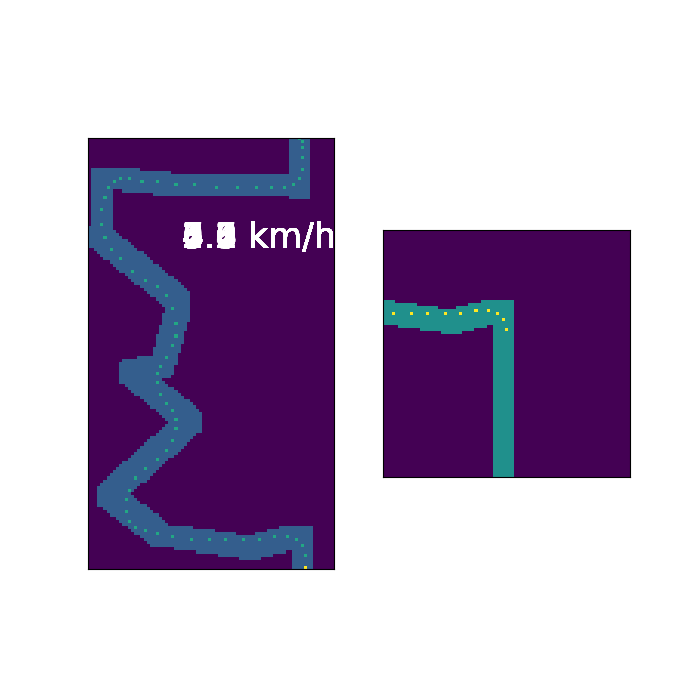

In [1]:
gcolab = False

try:
    import google.colab 
    gcolab = True
    from matplotlib import rc
    rc('animation', html='jshtml')

except ModuleNotFoundError:
    # for vscode
    %matplotlib ipympl

e.set_seed(seed=10)

model = CarNet()

optimizer = optim.Adam(model.parameters(), lr=0.0005, eps=1e-3)

trained_alg = a2c.A2C(model, optimizer, gamma=0.90, policy_weight=1., value_weight=0.1, entropy_weight=1., clip_grad=10.,
              checkpoint="checkpoint.pth", tensor_board=False)

ani = trained_alg.animate(env=e.Env(seed=450))

if gcolab:
    from IPython.display import HTML
    HTML(ani.to_html5_video())

Save animation in file

In [2]:
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=5) 
ani.save("animation.gif", writer=writer)